# 5. top2vec

## Background

Top2Vec is an unsupervised machine learning algorithm for topic modeling and semantic search. It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. 

The assumption the algorithm makes is that many semantically similar documents are indicative of an underlying topic. The first step is to create a joint embedding of document and word vectors with the use of Transformers. Once documents and words are embedded in a vector space the goal of the algorithm is to find dense clusters of documents, then identify which words attracted those documents together. Each dense area is a topic and the words that attracted the documents to the dense area are the topic words [source](https://github.com/ddangelov/Top2Vec).

In [1]:
from top2vec import Top2Vec
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/text_corpus.csv')

In [3]:
text_df = df['text_column']

In [4]:
df

,text_column
0,Nothing is coming out.
1,"Well, I declare."
2,"So today, we are going to be trying out some v..."
3,What I've tried. It's probably I think in rece...
4,I do use it. I feel like it does work and it r...
5,What do this viral virus? But would you buy th...
6,When is it when it's gone too far? We even buy...
7,Mr. We have a little stick here.
8,How do you remove the right time without tryin...
9,Places where number shaver me.


In [5]:
# tokenize
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text_df):
    """ A function to lower and tokenize text data """ 
    # Lower the text
    lower_text = text_df.lower()
    
    # remove texts with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', lower_text)
    
    lemma_text = [lemmatizer.lemmatize(tok) for tok in text]


    # tokenize the text into a list of words
    tokens = nltk.tokenize.word_tokenize(text)

    
    return tokens

# Final list with tokenized words
tokenized_final = []

# Iterating over each string in data
for x in text_df:
    # Calliing preprocess text function
    token = preprocess_text(x)

    tokenized_final.append(token)

#tokenize

def preprocess_text(text_df):
    """ A function to lower and tokenize text data """ 
    # Lower the text
    lower_text = text_df.lower()

    # tokenize the text into a list of words
    tokens = nltk.tokenize.word_tokenize(lower_text)

    return tokens
    
#Final list with tokenized words
tokenized_final = []

#Iterating over each string in data
for x in text_df:
    # Calliing preprocess text function
    token = preprocess_text(x)

    tokenized_final.append(token)

In [6]:
flattened_tokenized_final = [i for j in tokenized_final for i in j]

In [7]:
all_stopwords = stopwords.words('english')
additional_sw = ['one', 'two', 'five', 're', 'saw', 'will', 'by', 'into', 'so', 'come', 'in', 'then', 'on', 'be',
                'want', 'by', 'as', 'had']
all_stopwords.extend(additional_sw)

flattened_tokenized_final = [word for word in flattened_tokenized_final if word not in all_stopwords]

In [8]:
model = Top2Vec(documents=flattened_tokenized_final, speed="learn", workers=8)

2021-12-15 11:14:26,518 - top2vec - INFO - Pre-processing documents for training
2021-12-15 11:14:27,703 - top2vec - INFO - Creating joint document/word embedding
2021-12-15 11:18:49,078 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-15 11:20:29,751 - top2vec - INFO - Finding dense areas of documents
2021-12-15 11:20:44,430 - top2vec - INFO - Finding topics


In [9]:
model.get_num_topics()

139

In [10]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(f'\nTopic Sizes (number of documents most similar to each topic): \n{topic_sizes}')
print(f'\nUnique Topic Indexes: \n{topic_nums}')


Topic Sizes (number of documents most similar to each topic): 
[17029 12602 10994 10776  1002   974   970   966   966   964   963   961
   955   955   954   953   952   948   948   948   948   947   943   939
   934   934   933   932   932   931   931   929   929   928   928   928
   926   924   923   922   922   921   918   916   912   910   909   909
   906   905   904   904   903   902   902   901   900   900   899   898
   898   897   897   896   896   895   895   895   895   894   893   892
   888   887   886   886   886   885   883   883   882   881   880   880
   879   878   877   877   876   873   872   872   871   871   870   869
   868   868   867   865   864   863   862   861   860   860   859   858
   857   853   851   851   848   845   844   839   838   838   837   837
   836   832   831   827   826   821   820   820   820   818   815   813
   813   812   811   810   807   803   791]

Unique Topic Indexes: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 

In [11]:
topic_words, word_scores, topic_nums = model.get_topics(10)
print(f'\nTopic Words (top 50 words in order of semantic similarity to topic): \n{topic_words}')
print(f'\nTopic Scores (cosine similarity scores of the top 50 words to topic): \n{word_scores}')
print(f'\nUnique Topic Indexes: \n{topic_nums}')


Topic Words (top 50 words in order of semantic similarity to topic): 
[['part' 'three' 'year' 'time' 'full' 'self' 'get' 'female' 'birth' 'buy'
  'mean' 'knew' 'question' 'google' 'important' 'podcast' 'career' 'baby'
  'parents' 'put' 'done' 'change' 'step' 'god' 'fun' 'something' 'dating'
  'choose' 'phone' 'said' 'home' 'girls' 'whole' 'move' 'please' 'end'
  'years' 'comfortable' 'stop' 'fall' 'well' 'everything' 'woman' 'care'
  'health' 'issue' 'pay' 'call' 'better' 'got']
 ['old' 'anything' 'course' 'single' 'coming' 'happened' 'industry'
  'real' 'room' 'obviously' 'think' 'whatever' 'father' 'future' 'anyone'
  'interesting' 'left' 'correct' 'somebody' 'little' 'went' 'true'
  'basically' 'felt' 'younger' 'small' 'sister' 'okay' 'head' 'close'
  'spend' 'hot' 'entire' 'stuff' 'story' 'probably' 'terms' 'times'
  'came' 'feelings' 'means' 'cut' 'grow' 'stories' 'trying' 'sense'
  'face' 'line' 'ever' 'less']
 ['old' 'anyone' 'whatever' 'room' 'single' 'work' 'coming' 'industry

### Finding related keywords

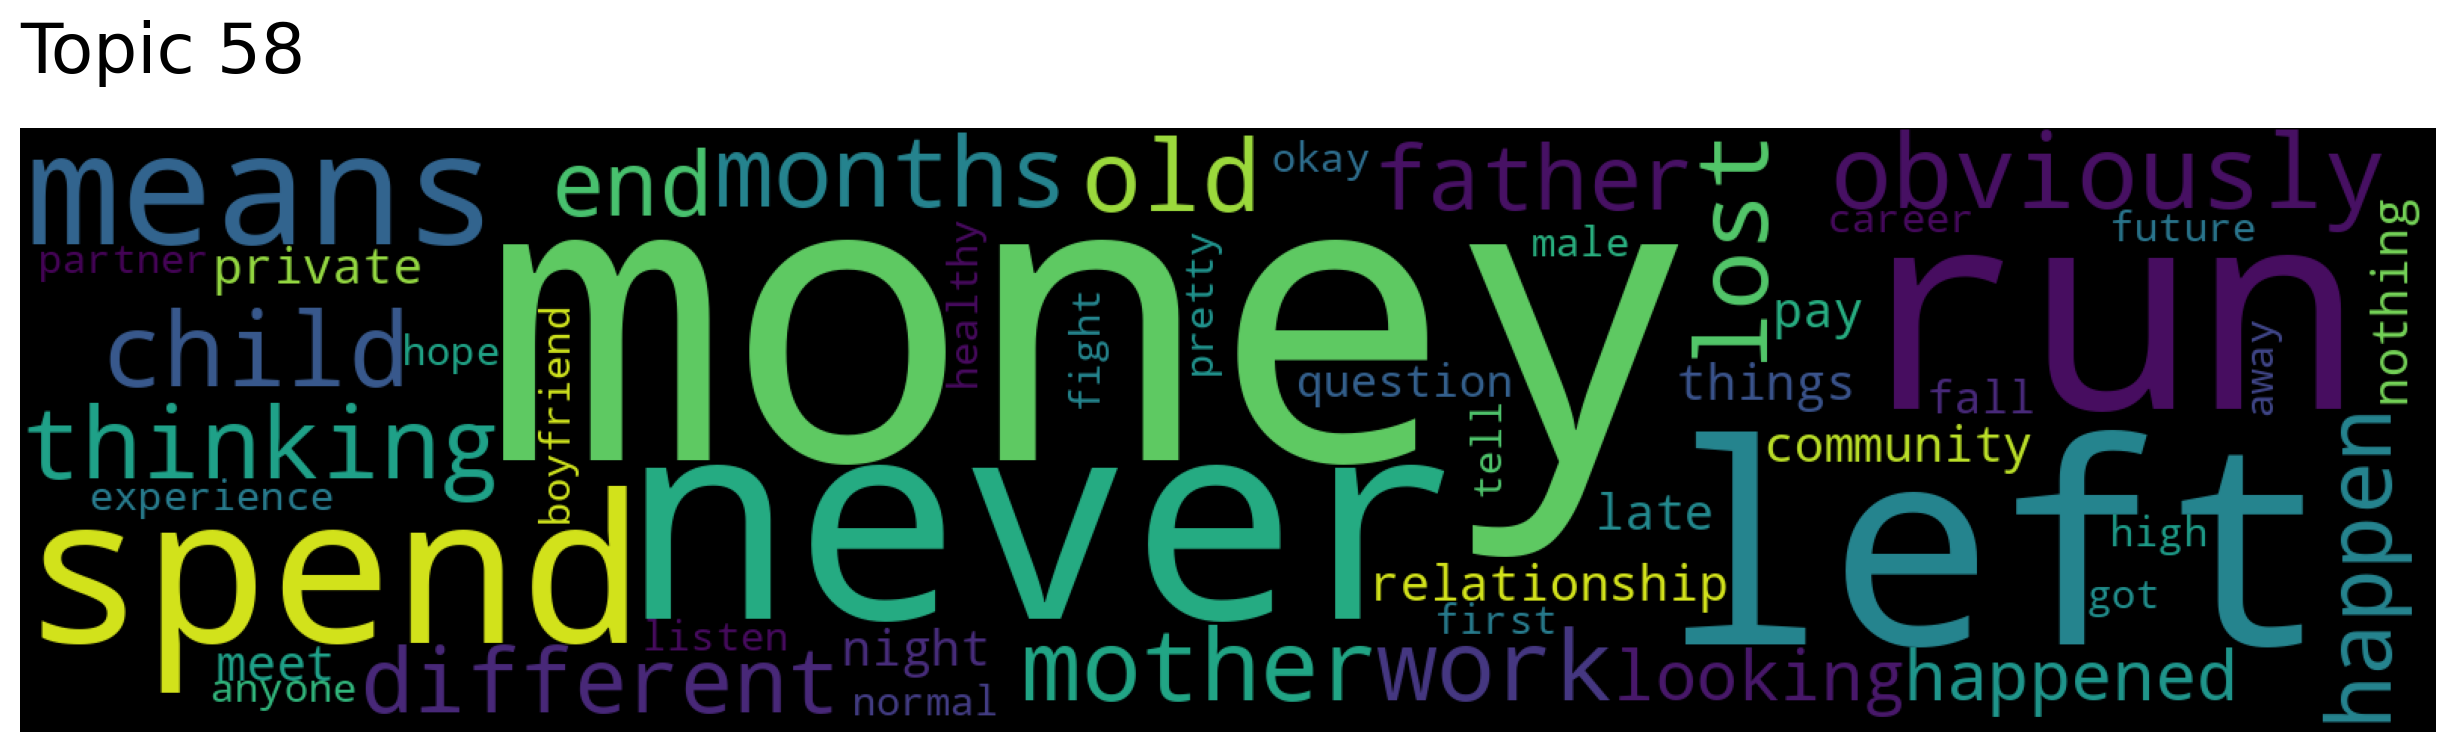

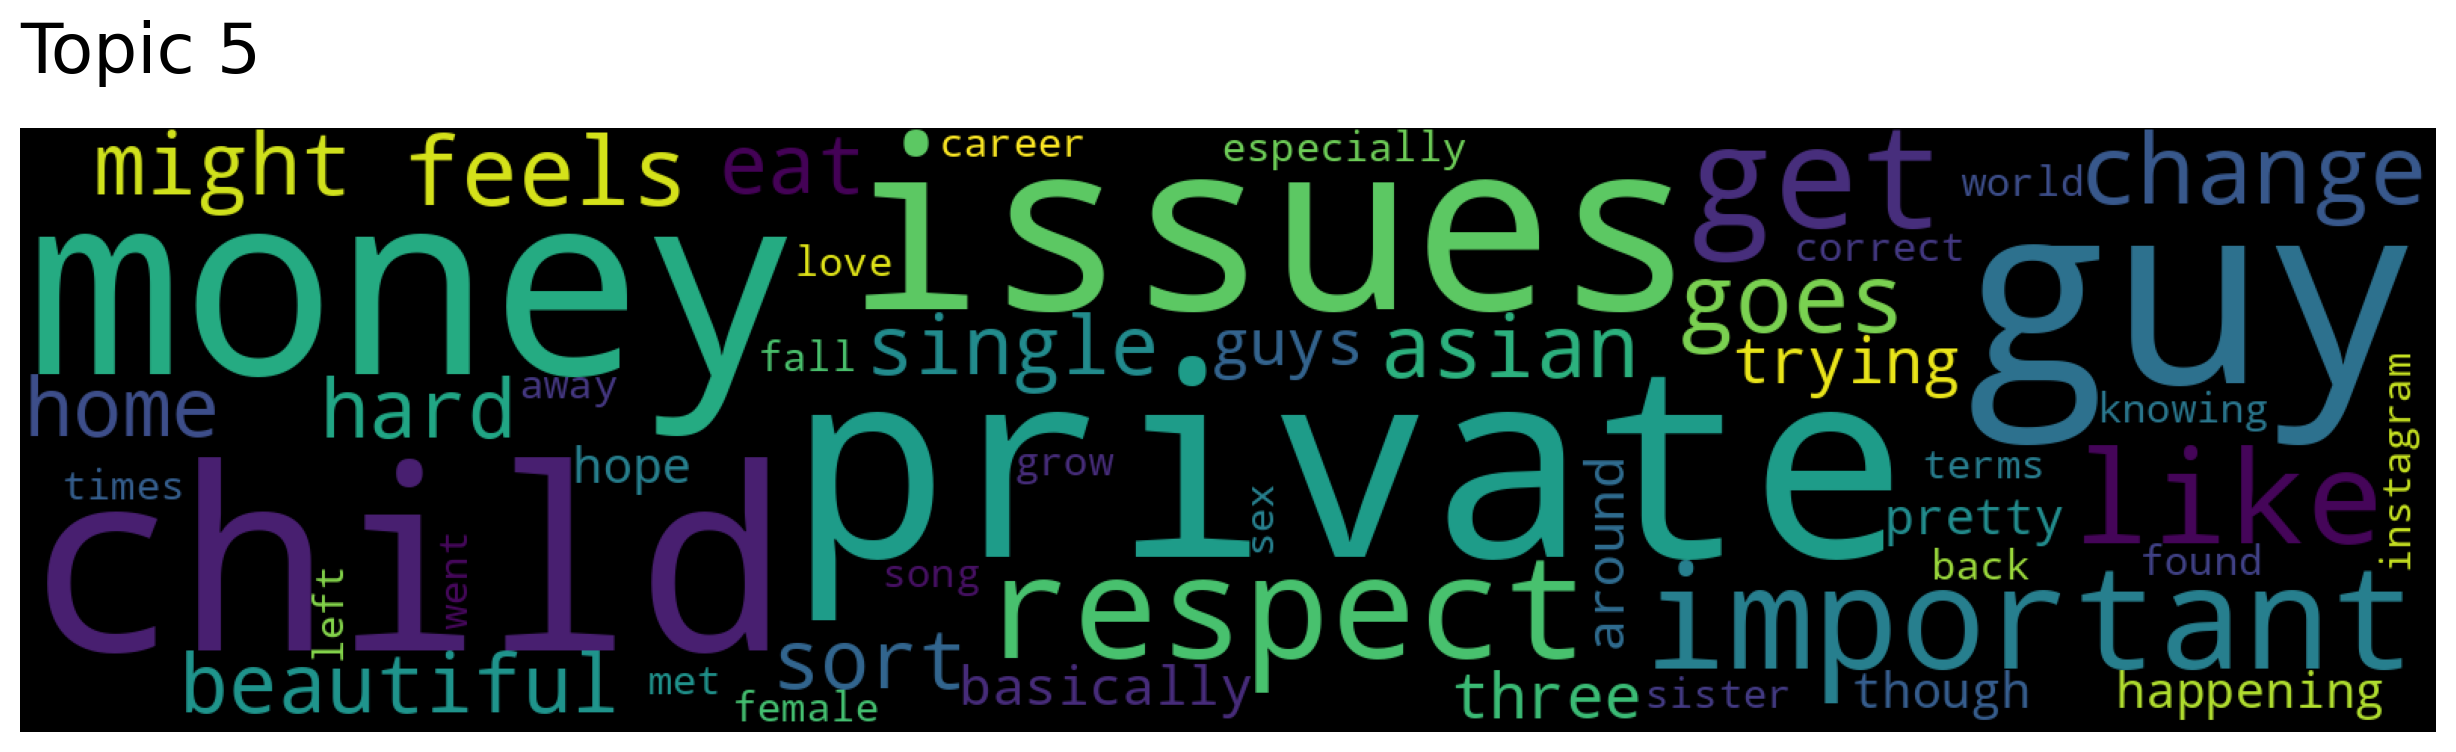

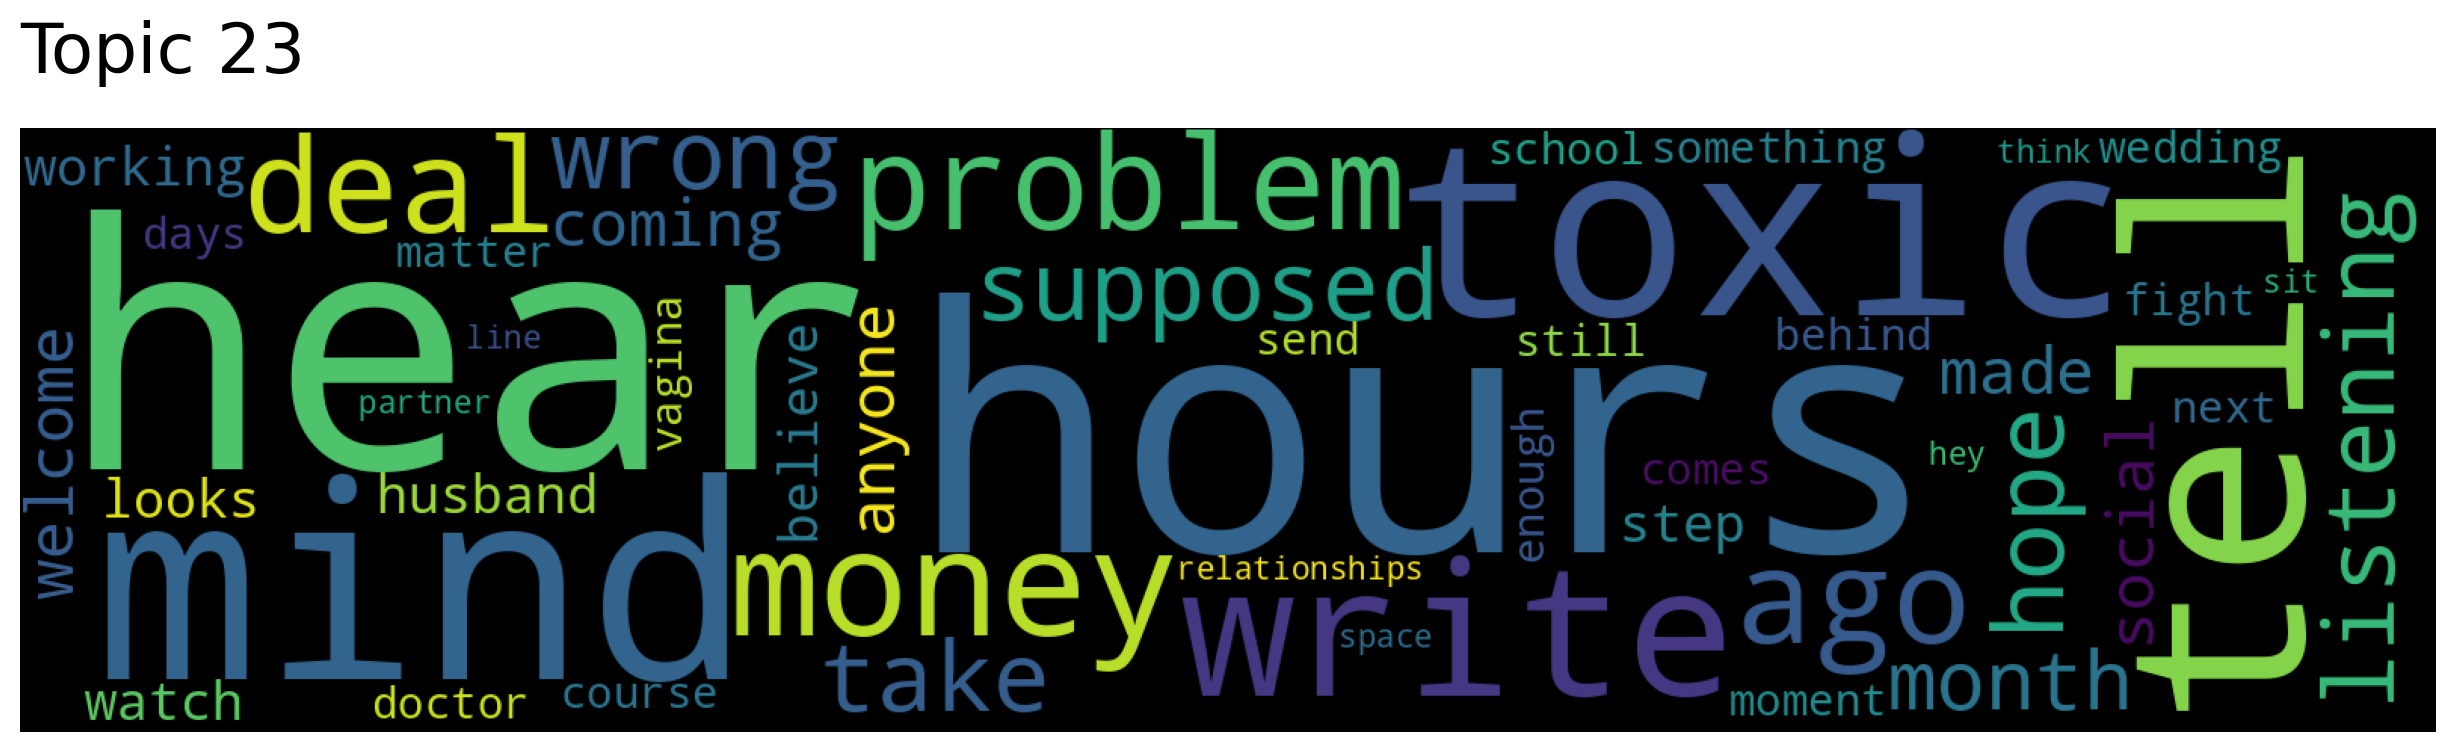

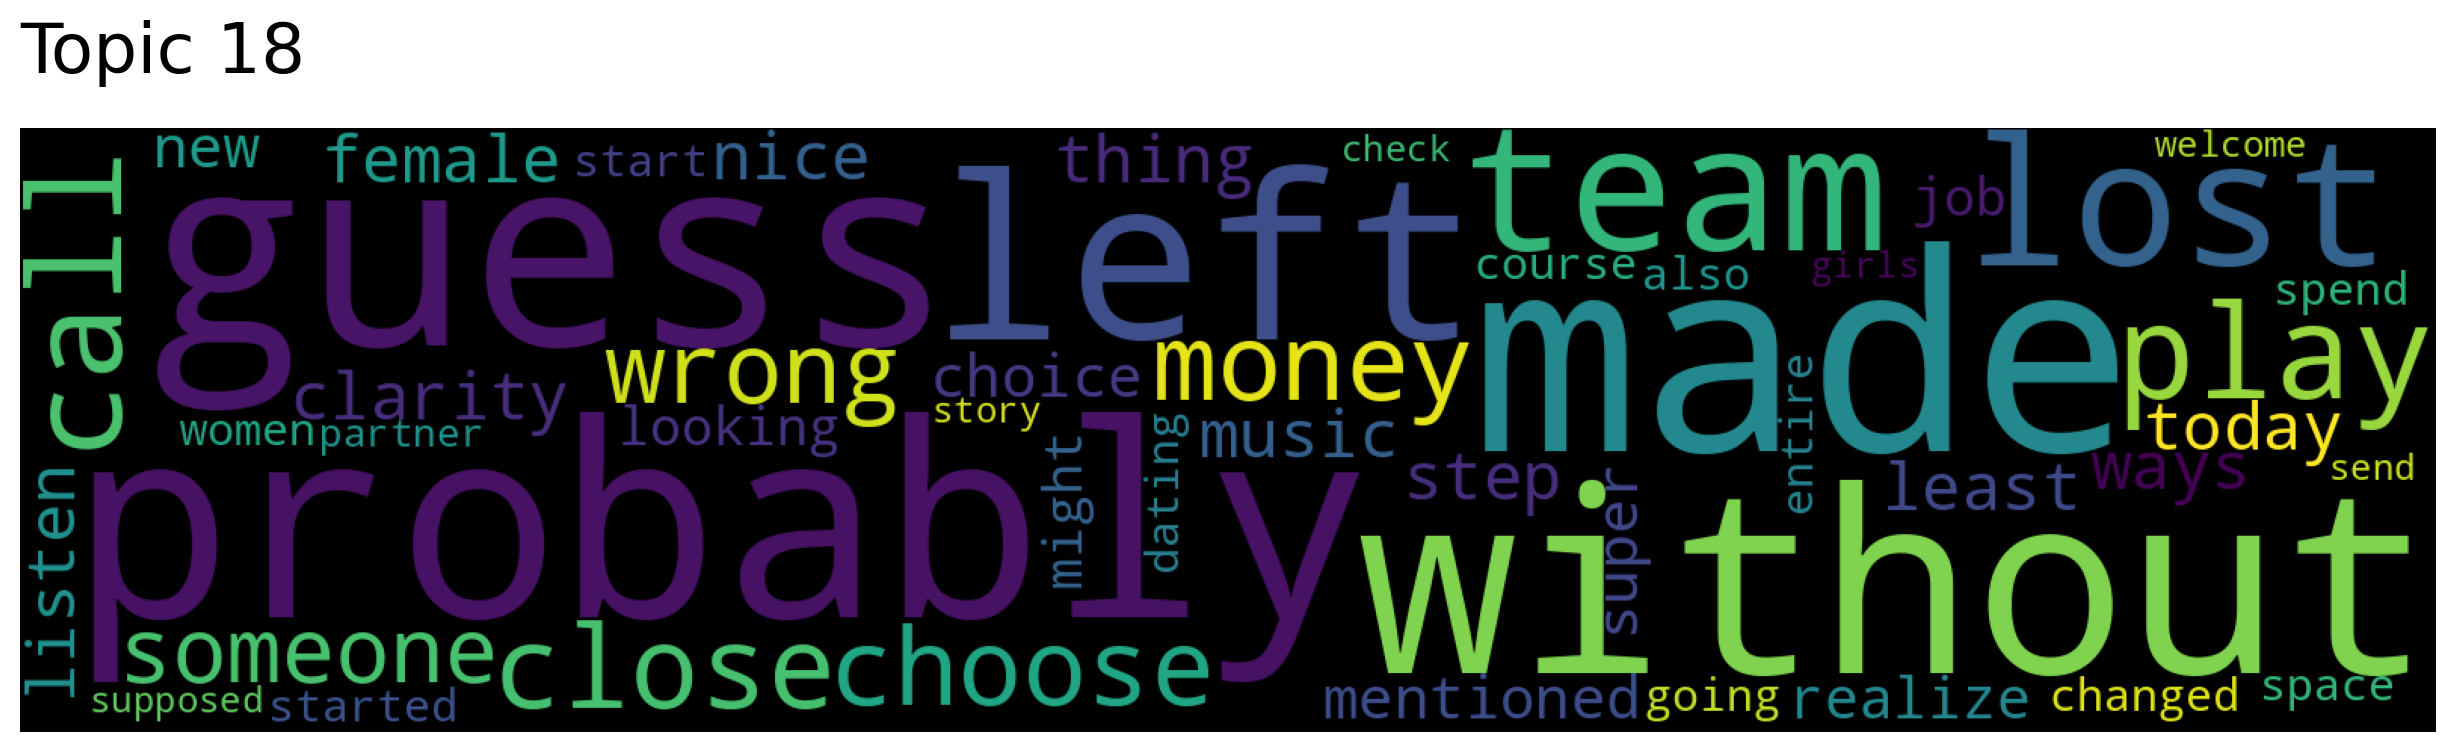

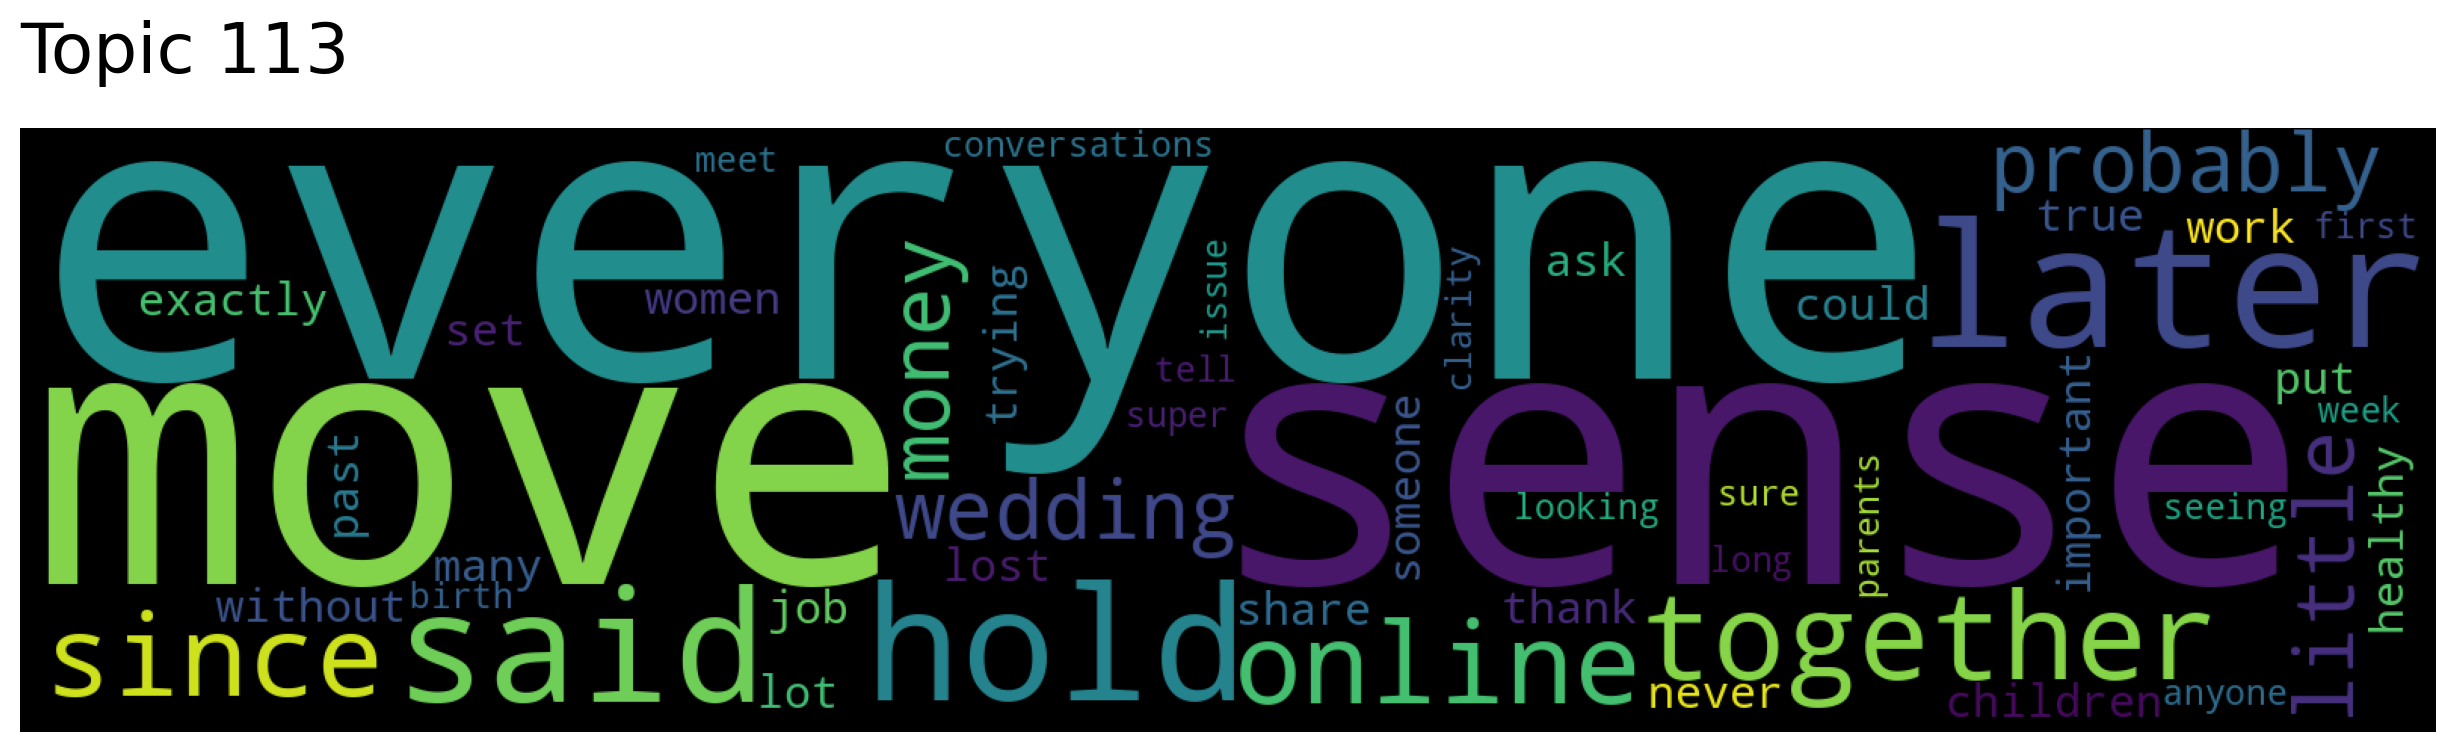

In [13]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["money"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [14]:
words, word_scores = model.similar_words(keywords=["money"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

toxic 0.18498792605065692
wear 0.1485115582803584
going 0.14483125414217135
things 0.13266288117196745
crazy 0.13180825614734595
like 0.12511820087681613
sure 0.11527451751120421
feel 0.11087462917285316
looks 0.1107991301394039
brought 0.11059791727727299
late 0.1097014981155868
left 0.10753449403984185
done 0.10752675698987145
baby 0.10560417326283016
youtube 0.10487240953423912
somebody 0.10396209685998324
music 0.10394112690470383
vagina 0.1033861295468975
lost 0.09730430016846488
year 0.09511963313841561


## Analysis Insights

The topic outputs from the Top2Vec model mainly corresponds to the ones from previous analyses:  health, harassment, relationships, passage of time, identity, gratefulness and career, entrepreneurship, conflict resolution, visibility/voicing out, family planning. <b>Money</b> is a new topic cluster gained from this Top2Vec analysis.